In [1]:
from model.model import EVSpaceModel
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
import numpy as np

In [2]:
CP_loc='inputs\CP_locs.csv'
POI_file = 'inputs/POIs.csv'
speed = 0.3

model = EVSpaceModel()  #CP_loc=CP_loc,POIs=POI_file
model.run_model(1000) #24*365   

In [3]:
mdf = model.datacollector.get_model_vars_dataframe()
adf = model.datacollector.get_agent_vars_dataframe()
# adf.to_csv('xx.csv')
mdf.to_csv('data/mdf.csv')
adf.to_csv('data/adf.csv')

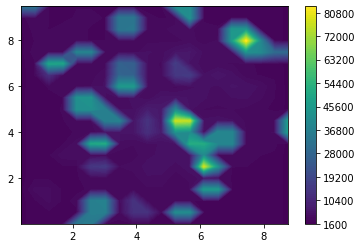

In [4]:
GP = model.datacollector_gridpoints.get_agent_vars_dataframe()
# XY = pd.DataFrame(GP['pos'].tolist()).rename({0:'X',1:'Y'},axis=1)

grid_spacing = model.cfg['agent_params']['Grid_Points']['grid_spacing']

GP_tot = GP.reset_index().groupby('AgentID').agg({'cars_passing':sum,'X':'first','Y':'first'})
# fig, ax = plt.subplots()
# sns.scatterplot(data=GP_tot, x='X',y='Y',c=GP_tot['cars_passing'])

X = GP_tot['X'].values.reshape((-1,grid_spacing))
Y = GP_tot['Y'].values.reshape((-1,grid_spacing))
Z = GP_tot['cars_passing'].values.reshape((-1,grid_spacing))

fig, ax = plt.subplots()
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cs = ax.contourf(X, Y, Z, 100)
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cbar = plt.colorbar(cs)


In [5]:
mdf

,av_charge,completed_trip,dead_cars,charge_load,date_time,av_moving,av_home,av_work,av_random
0,0.749042,0,0.000,0.00000,2022-01-01 00:00:00,0.000,0.710,0.082,0.208
1,0.788442,0,0.000,0.03960,2022-01-01 01:00:00,0.001,0.710,0.082,0.207
2,0.822192,4,0.000,0.03960,2022-01-01 02:00:00,0.007,0.714,0.082,0.197
3,0.843492,4,0.000,0.03980,2022-01-01 03:00:00,0.052,0.718,0.082,0.148
4,0.845842,30,0.000,0.04000,2022-01-01 04:00:00,0.098,0.748,0.082,0.072
...,...,...,...,...,...,...,...,...,...
996,0.703342,84,0.008,0.08060,2022-02-11 12:00:00,0.113,0.274,0.364,0.094
997,0.707242,87,0.005,0.08090,2022-02-11 13:00:00,0.120,0.251,0.371,0.109
998,0.699692,97,0.013,0.08015,2022-02-11 14:00:00,0.137,0.250,0.355,0.114
999,0.691142,116,0.013,0.08075,2022-02-11 15:00:00,0.123,0.252,0.343,0.134


,av_charge,completed_trip,dead_cars,charge_load,av_moving,av_home,av_work,av_random
hour,,,,,,,,
0,0.726157,75.904762,0.009667,0.081320,0.097071,0.511619,0.159524,0.085238
1,0.732152,79.261905,0.009167,0.081695,0.104762,0.523214,0.146286,0.088119
2,0.733969,83.428571,0.008333,0.080867,0.112071,0.528595,0.137167,0.095357
3,0.730527,86.809524,0.007214,0.079611,0.123167,0.522571,0.134762,0.103786
4,0.722858,92.738095,0.007286,0.078337,0.129571,0.512881,0.135524,0.115786
5,0.712387,103.214286,0.007119,0.076776,0.123595,0.491619,0.157429,0.125310
6,0.702889,106.952381,0.008048,0.075800,0.112262,0.463214,0.187524,0.135643
7,0.697556,95.261905,0.008833,0.075062,0.105405,0.428333,0.220000,0.140071
8,0.694701,94.761905,0.008929,0.075299,0.096333,0.395548,0.258262,0.136333


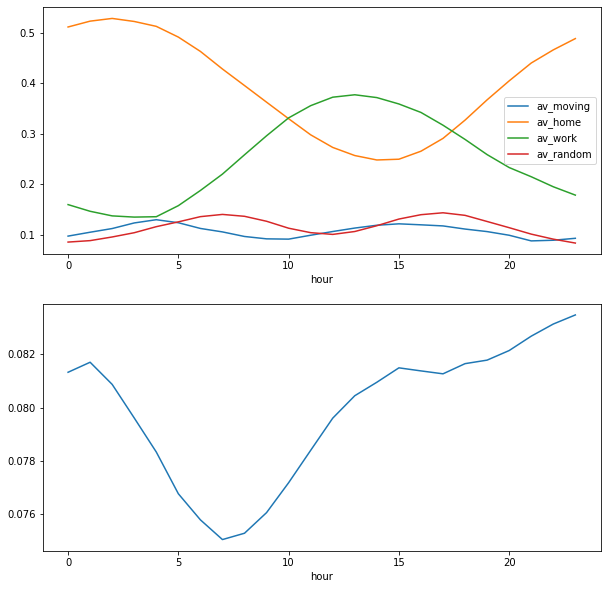

In [6]:
import pandas as pd
mdf['hour'] = pd.to_datetime(mdf.date_time).dt.hour
hourly = mdf.groupby('hour').mean()

fig, ax = plt.subplots(2, figsize=(10,10))
hourly[['av_moving','av_home','av_work','av_random']].plot(ax=ax[0])
hourly['charge_load'].plot(ax=ax[1])
hourly